###I have tried to avoid using Libraries as much as I could (Computed F1 score etc. by running loops instead of using libraries)



# Data Exploration

##Loading Data and Initial Feature Analysis

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
%matplotlib inline

In [2]:
!wget -O train.csv https://raw.githubusercontent.com/vanshbansal1505/ICG-Summer-Program-2021-DS/main/Assignment-1/data/train.csv

--2021-06-07 06:03:00--  https://raw.githubusercontent.com/vanshbansal1505/ICG-Summer-Program-2021-DS/main/Assignment-1/data/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16722 (16K) [text/plain]
Saving to: ‘train.csv’

train.csv           100%[===================>]  16.33K  --.-KB/s    in 0s      

2021-06-07 06:03:00 (33.1 MB/s) - ‘train.csv’ saved [16722/16722]



In [3]:
train=pd.read_csv('train.csv')
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.0,1,0,7.2500
1,2,1,1,female,38.0,1,0,71.2833
2,3,1,3,female,26.0,0,0,7.9250
3,4,1,1,female,35.0,1,0,53.1000
4,5,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
615,616,1,2,female,24.0,1,2,65.0000
616,617,0,3,male,34.0,1,1,14.4000
617,618,0,3,female,26.0,1,0,16.1000
618,619,1,2,female,4.0,2,1,39.0000


In [4]:
train.count()

PassengerId    620
Survived       620
Pclass         620
Sex            620
Age            489
SibSp          620
Parch          620
Fare           620
dtype: int64

We see that total Passengers are 620 and all columns except age have 0 non-null values. Age has 489 non-null and 131 null values.
Now we explore the data available to us to get an idea about factors that played a role in survival. 

##Catogerizing Features and deleting Rows with Null Values in Age 

Converting Sex in the data to numerical values; 0 for male, 1 for female

In [ ]:
for i in range(len(train['Sex'])):
  if train['Sex'][i]=='male':
    train['Sex'][i]=0.0
  else:  train['Sex'][i]=1.0

Dropping Rows with age as a NULL value, I attempte replacing age with median and with 0 but it gave lower accuracies on Test Data

In [6]:
train = train.dropna(axis = 0, how ='any')
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000
mean,307.022495,0.415133,2.229039,29.781186,0.541922,0.441718,34.233929
std,177.586591,0.493250,0.837575,14.404998,0.953198,0.845176,48.211438
min,1.000000,0.000000,1.000000,0.750000,0.000000,0.000000,0.000000
25%,152.000000,0.000000,1.000000,21.000000,0.000000,0.000000,8.050000
50%,308.000000,0.000000,2.000000,28.000000,0.000000,0.000000,16.100000
75%,457.000000,1.000000,3.000000,38.000000,1.000000,1.000000,33.500000
max,620.000000,1.000000,3.000000,71.000000,5.000000,5.000000,512.329200


##Creating catogeries for Fare and Age to plot them with ease for data exploration

In [7]:
print(np.mean(train['Fare']),np.median(train['Fare']),np.std(train['Fare']))
bins = [-100, 8.05, 16.1, 33.5, 513]
labels = [0.0, 1.0, 2.0, 3.0]
Fare_cat = pd.cut(train['Fare'], bins = bins, labels=labels)

Fare_cat.value_counts()

34.23392903885475 16.1 48.16211718935626


0.0    128
3.0    122
2.0    121
1.0    118
Name: Fare, dtype: int64

We have created an almost even distribution for Fare after catogerizing it

In [8]:
bins = [-1, 4, 18, 30, 50, 80]
labels = [0.0,1.0,2.0,3.0,4.0]
Age_cat = pd.cut(train['Age'], bins = bins, labels=labels)
Age_cat.value_counts()

2.0    193
3.0    162
1.0     62
4.0     44
0.0     28
Name: Age, dtype: int64

Age Distribution also catogerised, adults and young people max in number

## Calculation Of Percentage Of Survivors for each Feature:

I will plot bar graphs for Survival rate for each feature

In [9]:
X1=[1,2,3] 
Y1=[0,0,0] 

for i in [1,2,3]:
  Y1[i-1] = train['Survived'][train['Pclass']==i].mean()*100

X2=['male','female'] 
Y2=[0,0] 

for i in [0,1]:
  Y2[i] = train['Survived'][train['Sex']==i].mean()*100

X3=['0-4','4-18','18-30','30-50','>50'] 
Y3=[0,0,0,0,0] 

for i in [0,1,2,3,4]:
  Y3[i] = train['Survived'][Age_cat==i].mean()*100

X4=[0,1,2,3,4,5] 
Y4=[0,0,0,0,0,0] 

for i in [0,1,2,3,4,5]:                                                               # np.unique(train['SibSp']) gives-> array([0, 1, 2, 3, 4, 5])
  Y4[i] = train['Survived'][train['SibSp']==i].mean()*100

X5=[0,1,2,3,4,5] 
Y5=[0,0,0,0,0,0] 

for i in [0,1,2,3,4,5]:                                                               # np.unique(train['Parch']) gives-> array([0, 1, 2, 3, 4, 5])
  Y5[i] = train['Survived'][train['Parch']==i].mean()*100

X6=['Low','Below Median','Above Median','High'] 
Y6=[0,0,0,0] 

for i in [0,1,2,3]:
  Y6[i] = train['Survived'][Fare_cat==i].mean()*100



## Plotting Bar Graphs and Inference from Data Exploration: 

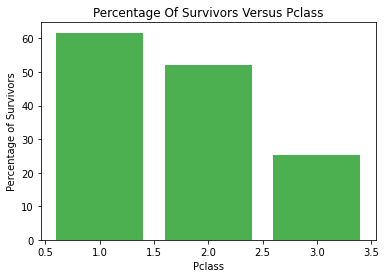

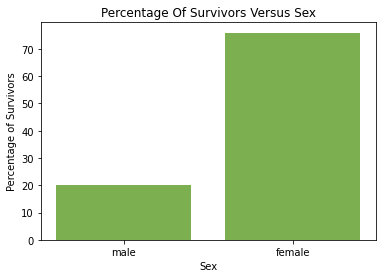

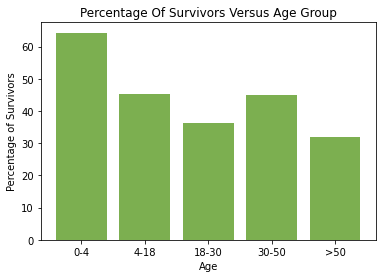

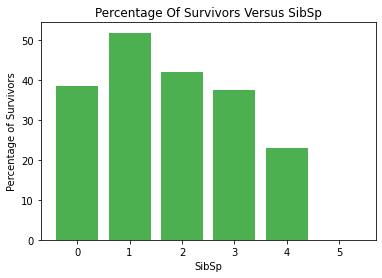

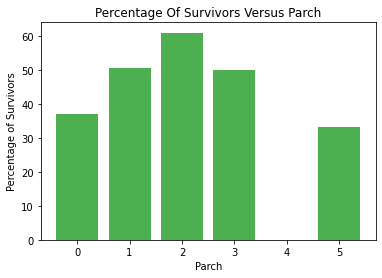

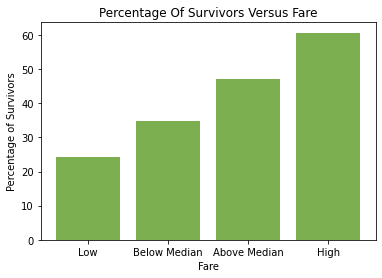

In [10]:
plt.bar(X1,Y1,color='#4CAF50') 
plt.title("Percentage Of Survivors Versus Pclass") 
plt.xlabel("Pclass") 
plt.ylabel("Percentage of Survivors") 
plt.show()

plt.bar(X2,Y2,color='#7CAF50') 
plt.title("Percentage Of Survivors Versus Sex") 
plt.xlabel("Sex") 
plt.ylabel("Percentage of Survivors") 
plt.show()

plt.bar(X3,Y3,color='#7CAF50') 
plt.title("Percentage Of Survivors Versus Age Group") 
plt.xlabel("Age") 
plt.ylabel("Percentage of Survivors") 
plt.show()

plt.bar(X4,Y4,color='#4CAF50') 
plt.title("Percentage Of Survivors Versus SibSp") 
plt.xlabel("SibSp") 
plt.ylabel("Percentage of Survivors") 
plt.show()

plt.bar(X5,Y5,color='#4CAF50') 
plt.title("Percentage Of Survivors Versus Parch") 
plt.xlabel("Parch") 
plt.ylabel("Percentage of Survivors") 
plt.show()

plt.bar(X6,Y6,color='#7CAF50') 
plt.title("Percentage Of Survivors Versus Fare") 
plt.xlabel("Fare") 
plt.ylabel("Percentage of Survivors") 
plt.show()

<p>Clearly, Female passengers have a much greater chance of survival, this might not be completely related to gender but other factors like the fact that women travelled mostly with families and in first class helped their survival. Nevertheless, this is a factor worth considering, we have already converted sex to numerical values to be used by the ML Model. The Age, SibSp and Parch also seem to show variation in Survival Rate.<p> Survival rate also goes up as Pclass improves; higher Fares also improves chance of survival, there is a strong possibility that these two are interrelated, i.e. Higher Fare is generally for Pclass=1. We find if this assumption is true using the plot below: 

##Deciding Features for Logistic Regression


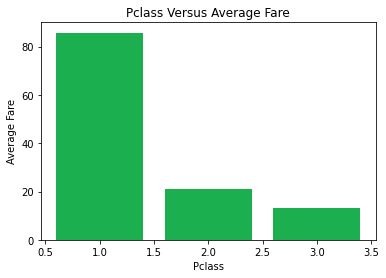

In [11]:
X7=[1,2,3] 
Y7=[0,0,0] 

for i in [1,2,3]:
  Y7[i-1] = train['Fare'][train['Pclass']==i].mean()

plt.bar(X7,Y7,color='#1CAF50') 
plt.title("Pclass Versus Average Fare") 
plt.ylabel("Average Fare") 
plt.xlabel("Pclass") 
plt.show()

<p>Clearly there is a strong correlation between class and Fare, hence we will use only Fare in our model as it represents a richer group of data and avoid using Pclass as it represents similar data and would make training slower and could also reduce accuracy..<p>
Therefore, we will use the Features: Sex, Age, SibSp, Parch and Fare.

#Logistic Regression Model and Training:

Choosing features and normalizing data:

In [12]:
x_train = train[['Sex','Age','SibSp','Parch','Fare']]
y_train = train['Survived']

x_train = (x_train-x_train.min())/(x_train.max()-x_train.min())
x_train

,Sex,Age,SibSp,Parch,Fare
0,0,0.302491,0.2,0.0,0.014151
1,1,0.530249,0.2,0.0,0.139136
2,1,0.359431,0.0,0.0,0.015469
3,1,0.487544,0.2,0.0,0.103644
4,0,0.487544,0.0,0.0,0.015713
...,...,...,...,...,...
615,1,0.330961,0.2,0.4,0.126872
616,0,0.473310,0.2,0.2,0.028107
617,1,0.359431,0.2,0.0,0.031425
618,1,0.046263,0.4,0.2,0.076123


Defining Sigmoid and loss functions(Loss used is Mean Square Error):

In [13]:
def sigmoid(x):
  return 1/(1+np.exp(-x))
def loss(y_pred, target):
  return np.mean((y_pred - target)*(y_pred - target))
def cost_func(y_pred, target):
  epsilon = 0.0001
  return -np.mean( (target*np.log(y_pred+epsilon) ) + ( (1-target)*(np.log(1-y_pred+epsilon)) ) )


Training Model for different learning rate and plotting loss with epochs: 

Learning Rate: 7.0


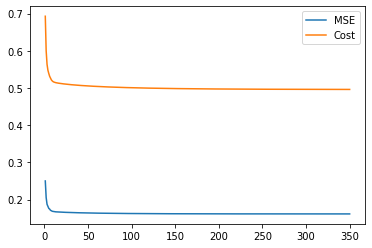

Learning Rate: 7.1


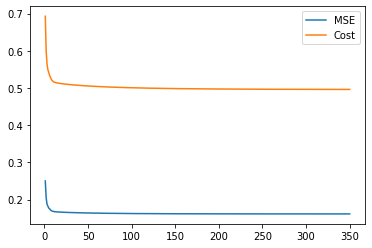

Learning Rate: 7.2


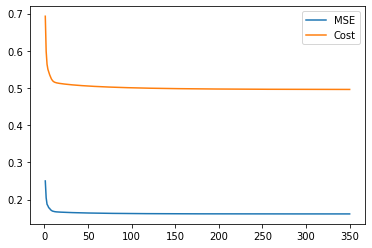

Learning Rate: 7.3


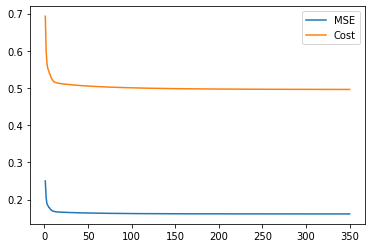

Learning Rate: 7.4


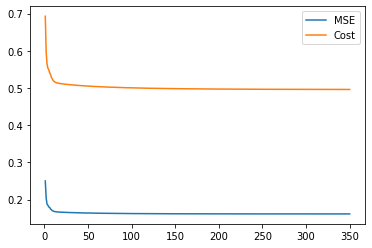

Learning Rate: 7.5


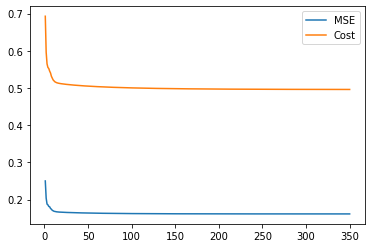

Learning Rate: 7.6


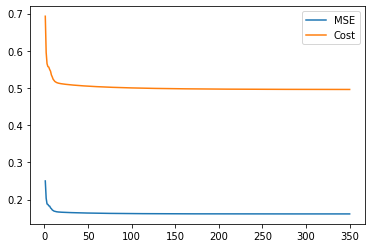

Learning Rate: 7.7


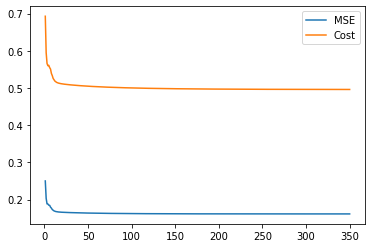

Learning Rate: 7.8


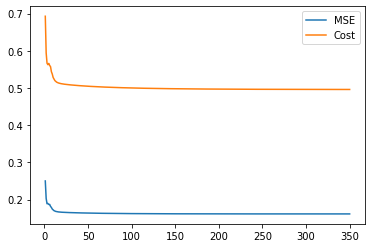

Learning Rate: 7.9


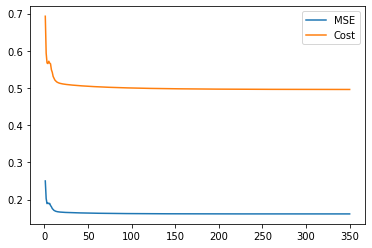

In [14]:
for i in range(70,80):
  alpha = 0.1*i 
  W = [0,0,0,0,0]
  losses=[]
  costs=[]
  epoch= list(range(1, 351))
  b = 0
  for i in range(350):
   pred = np.dot(x_train, W) + b
   pred = pred.astype(float)
   y_pred = sigmoid(pred)
   MSE = loss(y_pred, y_train)
   cost = cost_func(y_pred,y_train)
   losses.append(MSE)
   costs.append(cost)
   W = W + alpha * np.dot((y_train-y_pred).T, x_train)/x_train.shape[0]
   b = b + alpha * np.mean(y_train-y_pred)
  print('Learning Rate:',format(alpha,".1f"))
  plt.plot(epoch,losses)
  plt.plot(epoch,costs)  
  plt.legend(['MSE','Cost'])
  plt.show()

Learning Rate around 7.2 seems to be the ideal one, beyond it we see fluctuations, also the cost and mean square loss show almost no variation beyond 200 epochs.

In [15]:
  alpha = 7.2
  W = [0,0,0,0,0]
  losses=[]
  b = 0
  for i in range(201):
   pred = np.dot(x_train, W) + b
   pred = pred.astype(float)
   y_pred = sigmoid(pred)
   MSE = loss(y_pred, y_train)
   cost = cost_func(y_pred,y_train) 
   losses.append(MSE)
   W = W + alpha * np.dot((y_train-y_pred).T, x_train)/x_train.shape[0]
   b = b + alpha * np.mean(y_train-y_pred)

We now have the trained weights, In sigmoid we take prediction to be 1 when sigmoid gives value >0.5, we store the predicted values below:

In [16]:
train_prediction = y_pred
for i in range(len(y_pred)):
  if (y_pred[i]<0.5): train_prediction[i]=0
  else: train_prediction[i]=1

Calculating Accuracy, F1 score and printing deliverables 

In [17]:
orig_values=[]
for i in y_train:
  orig_values.append(i)

true_pos = 0
false_pos = 0
true_neg = 0
false_neg = 0


for i in range(len(train_prediction)):
  if (train_prediction[i]==1 and orig_values[i]==1): true_pos+=1
  elif (train_prediction[i]==0 and orig_values[i]==1): false_neg+=1
  elif (train_prediction[i]==1 and orig_values[i]==0): false_pos+=1
  elif (train_prediction[i]==0 and orig_values[i]==0): true_neg+=1 

precision = ((true_pos)/(true_pos+false_pos))
recall = ((true_pos)/(true_pos+false_neg))

acc = (true_pos+true_neg)/(true_pos+false_neg+true_neg+false_pos)
F1_score = (2*precision*recall)/(precision+recall)

print('For Training Data:','\nAccuracy =',acc*100,'%\nMSE Loss =',MSE,'\nCost =',cost,'\nF1 Score =',F1_score)

For Training Data: 
Accuracy = 78.11860940695297 %
MSE Loss = 0.1615009721962004 
Cost = 0.4971774672525892 
F1 Score = 0.724935732647815


#Running Model on Test Dataset

We now load the test dataset, predict values for it and print the deliverables at the end:

In [18]:
!wget -O test.csv https://raw.githubusercontent.com/vanshbansal1505/ICG-Summer-Program-2021-DS/main/Assignment-1/data/test.csv

--2021-06-07 06:03:17--  https://raw.githubusercontent.com/vanshbansal1505/ICG-Summer-Program-2021-DS/main/Assignment-1/data/test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7385 (7.2K) [text/plain]
Saving to: ‘test.csv’

test.csv            100%[===================>]   7.21K  --.-KB/s    in 0s      

2021-06-07 06:03:17 (56.6 MB/s) - ‘test.csv’ saved [7385/7385]



In [19]:
test=pd.read_csv('test.csv')
test

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,621,0,3,male,27.0,1,0,14.4542
1,622,1,1,male,42.0,1,0,52.5542
2,623,1,3,male,20.0,1,1,15.7417
3,624,0,3,male,21.0,0,0,7.8542
4,625,0,3,male,21.0,0,0,16.1000
...,...,...,...,...,...,...,...,...
266,887,0,2,male,27.0,0,0,13.0000
267,888,1,1,female,19.0,0,0,30.0000
268,889,0,3,female,NaN,1,2,23.4500
269,890,1,1,male,26.0,0,0,30.0000


In [ ]:
for i in range(len(test['Sex'])):
  if test['Sex'][i]=='male':
    test['Sex'][i]=0.0
  else:  test['Sex'][i]=1.0

In [21]:
test = test.dropna(axis = 0, how ='any')
test.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000
mean,756.240000,0.386667,2.253333,29.520756,0.448889,0.408889,35.695519
std,78.680838,0.488072,0.841342,14.817980,0.875414,0.872144,62.037074
min,621.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,689.000000,0.000000,1.000000,20.000000,0.000000,0.000000,7.925000
50%,755.000000,0.000000,3.000000,28.000000,0.000000,0.000000,13.500000
75%,822.000000,1.000000,3.000000,39.000000,1.000000,1.000000,33.000000
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


In [22]:
x_test = test[['Sex','Age','SibSp','Parch','Fare']]
y_test = test['Survived']

x_test = (x_test-x_test.min())/(x_test.max()-x_test.min())
x_test

,Sex,Age,SibSp,Parch,Fare
0,0,0.334004,0.2,0.000000,0.028213
1,0,0.522493,0.2,0.000000,0.102579
2,0,0.246042,0.2,0.166667,0.030726
3,0,0.258608,0.0,0.000000,0.015330
4,0,0.258608,0.0,0.000000,0.031425
...,...,...,...,...,...
265,1,0.484795,0.0,0.833333,0.056848
266,0,0.334004,0.0,0.000000,0.025374
267,1,0.233476,0.0,0.000000,0.058556
269,0,0.321438,0.0,0.000000,0.058556


In [23]:
pred_test = np.dot(x_test, W) + b
pred_test = pred_test.astype(float)
y_pred_test = sigmoid(pred_test)

In [24]:
test_prediction = y_pred_test
for i in range(len(y_pred_test)):
  if (y_pred_test[i]<0.5): test_prediction[i]=0
  else: test_prediction[i]=1

In [25]:
orig_values_test=[]
for i in y_test:
  orig_values_test.append(i)

true_pos_t = 0
false_pos_t = 0
true_neg_t = 0
false_neg_t = 0


for i in range(len(test_prediction)):
  if (test_prediction[i]==1 and orig_values_test[i]==1): true_pos_t+=1
  elif (test_prediction[i]==0 and orig_values_test[i]==1): false_neg_t+=1
  elif (test_prediction[i]==1 and orig_values_test[i]==0): false_pos_t+=1
  elif (test_prediction[i]==0 and orig_values_test[i]==0): true_neg_t+=1 

precision_t = ((true_pos_t)/(true_pos_t+false_pos_t))
recall_t = ((true_pos_t)/(true_pos_t+false_neg_t))

acc_t = (true_pos_t+true_neg_t)/(true_pos_t+false_neg_t+true_neg_t+false_pos_t)
F1_score_t = (2*precision_t*recall_t)/(precision_t+recall_t)
MSE_t = loss(y_pred_test, y_test)
cost_t = cost_func(y_pred_test, y_test)

print('For Test Data:','\nAccuracy =',acc_t*100,'%\nMSE Loss =',MSE_t,'\nCost =',cost,'\nF1 Score =',F1_score_t)

For Test Data: 
Accuracy = 78.22222222222223 %
MSE Loss = 0.21777777777777776 
Cost = 0.4971774672525892 
F1 Score = 0.6993865030674846


#Final Statistics

<p>For Training Data: 

```
Accuracy = 78.11860940695297 %
MSE Loss = 0.1615009721962004 
Cost = 0.4971774672525892 
F1 Score = 0.724935732647815
```
<p><p>
For Test Data: 

```
Accuracy = 78.22222222222223 %
MSE Loss = 0.21777777777777776 
Cost = 0.4971774672525892 
F1 Score = 0.6993865030674846
```
<p>

#Citations:

https://towardsdatascience.com/logistic-regression-detailed-overview-46c4da4303bc

https://medium.com/analytics-vidhya/your-guide-for-logistic-regression-with-titanic-dataset-784943523994

https://www.kaggle.com/melikesozeri/logistic-regression-without-scikit-learn

